In [4]:
#필요 라이브러리 import
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 카페 폐업률 생존분석

1. Kaplan-Mieier 생존곡선(비모수적)
2. Cox 비례위험모형(반모수적)

## 1. Kaplan-Meier 생존 곡선

### (1) 데이터 확인하기

In [5]:
# 데이터 불러오기
data = pd.read_csv("./cafe_set_data", index_col = 0)
data.head()

,프랜차이즈,소형면적,폐업,영업기간,영업기간(월)
0,0,0,1,7,0
1,0,1,1,5,0
2,0,0,1,14,0
3,0,1,1,5,0
4,0,0,1,40,1


In [6]:
data['영업기간(월)'].value_counts()

영업기간(월)
0       1263
7        771
12       770
24       744
23       714
        ... 
633        1
1156       1
548        1
529        1
491        1
Name: count, Length: 629, dtype: int64

In [7]:
#데이터 형태 파악
data.shape

(57561, 5)

In [8]:
#데이터 자료형 확인
data.dtypes

프랜차이즈      int64
소형면적       int64
폐업         int64
영업기간       int64
영업기간(월)    int64
dtype: object

In [9]:
#데이터 결측치 확인
data.isnull().sum()

프랜차이즈      0
소형면적       0
폐업         0
영업기간       0
영업기간(월)    0
dtype: int64

In [10]:
#데이터 결측치 제거


In [11]:
#데이터 형태 확인
data.shape

(57561, 5)

### (2) 데이터 그래프로 분포 확인하기
- 히스토그램을 활용하여 확인

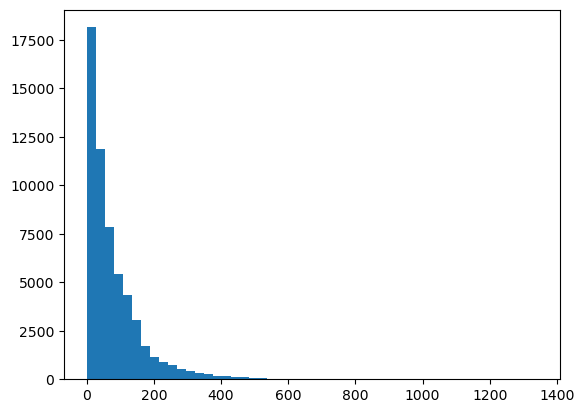

In [14]:
#데이터 분포 히스토그램 그리기
T = data["영업기간(월)"]
E = data["폐업"]
plt.hist(T, bins = 50)
plt.show()

### (3) Kaplan_Meier 생존곡선 그리기

<Axes: xlabel='timeline'>

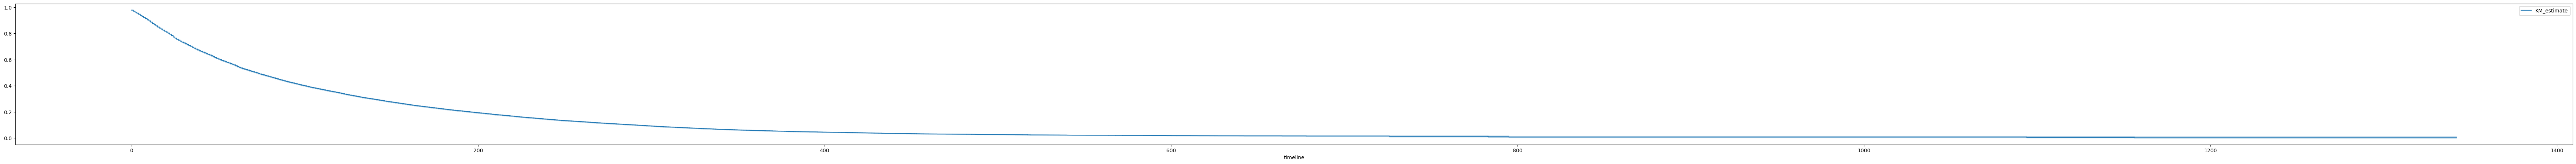

In [15]:
#km 모델에 데이터 적용 - 전체 데이터에 대한 생존곡선
# kmf = KaplanMeierFitter()
# kmf.fit(durations = T, event_observed = E)

# plot = kmf.plot_survival_function()
# plot.set_xlabel('time')
# plot.set_ylabel('S(t)')
# plot
plt.figure(figsize=(90, 5))
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()


Text(0.5, 1.0, 'Survival of different size group')

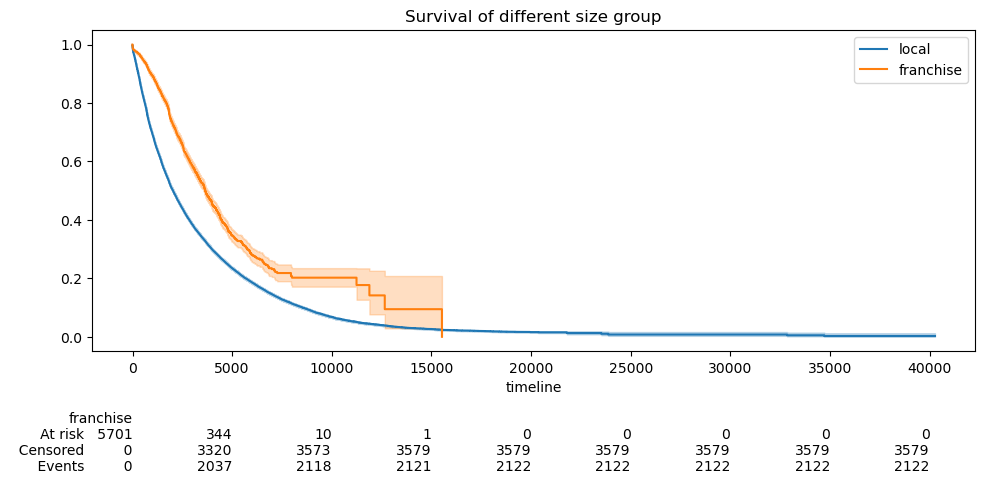

In [78]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
m = (data["프랜차이즈"] == 0)
kmf.fit(durations = T[m], event_observed = E[m], label = "local")
kmf.plot_survival_function(ax = ax)
kmf.fit(T[~m], event_observed = E[~m], label = "franchise")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different size group")

In [ ]:
# 생존 실패 곡선
kmf.plot_cumulative_density()

In [ ]:
#생존 분포 확인 - 평균, 유의 수준내 하한, 상한 -> 필요한가?

In [ ]:
#카테고리 별 생존곡선 - 카테고리 : 대학개수(0, 1, 2, 3?)


### (4) log rank model
- 카테고리별 통계적으로 유의한 차이를 보이는 지 확인

## 2. Cox 비례위험 모형

(1) 데이터 불러오기
(2) 데이터 살펴보기
(3) dummy 변수 만들기
(4) Cox 모델에 넣기


In [16]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data, duration_col = '영업기간(월)', event_col = '폐업')
cph.print_summary()

/Users/mindy/anaconda3/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 57561 total observations, 17946 right-censored observations>
             duration col = '영업기간(월)'
                event col = '폐업'
      baseline estimation = breslow
   number of observations = 57561
number of events observed = 39615
   partial log-likelihood = -311016.77
         time fit was run = 2023-12-08 11:42:43 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
프랜차이즈      -0.73       0.48       0.02            -0.78            -0.69                 0.46                 0.50
소형면적       -0.13       0.88       0.01            -0.15            -0.10                 0.86                 0.90
영업기간       -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

            cmp to       z      p   -log2(p)
covariate                                   
프랜차이즈         0.00  -32.66 <0.005     774.70
소형면적          0.00  -10.97 <0.005      90.57
영업기간          0.00 -174.37 <0.005        inf
---
Concordance = 0.99
Partial AIC = 622039.54
log-likelihood ratio test = 171076.05 on 3 df
-log2(p) of ll-ratio test = inf

<Axes: xlabel='log(HR) (95% CI)'>

/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph

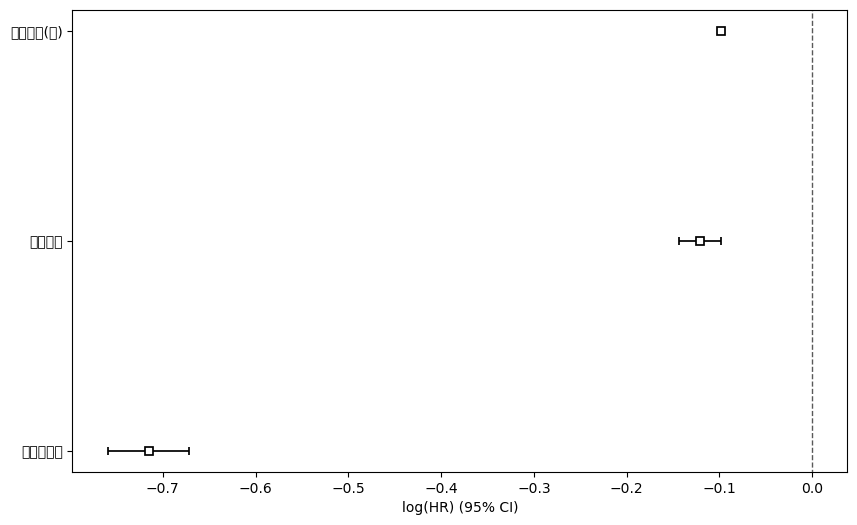

In [56]:
plt.subplots(figsize = (10, 6))
cph.plot()

<Axes: >

/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from current font.
  func(*args, **kwargs)
/Users/mindy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: 

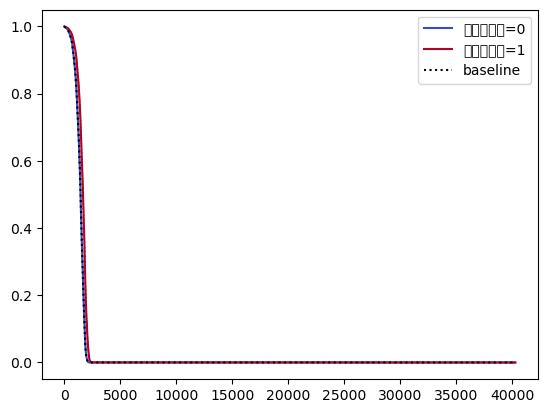

In [59]:
cph.plot_partial_effects_on_outcome(covariates = '프랜차이즈', values = [0, 1], cmap = 'coolwarm')

In [60]:
cph.check_assumptions(data, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 57561 total observations, 17946 right-censored observations>
         test_name = proportional_hazard_test

---
              test_statistic      p  -log2(p)
소형면적    km            137.53 <0.005    103.09
        rank          144.88 <0.005    108.43
영업기간(월) km              4.48   0.03      4.86
        rank            3.79   0.05      4.28
프랜차이즈   km             28.29 <0.005     23.19
        rank           37.41 <0.005     29.96



1. Variable '프랜차이즈' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['프랜차이즈', ...]` in the call
in `.fit`. See documentation in link [E] below.

2. Variable '소형면적' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['소형면적', ...]` in the call in
`.fit`. See documentation in link [E] below.

3. Variable '영업기간(월)' failed the non-proportional test: p-value is 0.0343.

   Advice 1: the functional form of the variable '영업기간(월)' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable '영업기간(월)' using pd.cut, and then specify it in
`strata=['영업기간(월)', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding 

[]

In [61]:
from lifelines.statistics import proportional_hazard_test
results = proportional_hazard_test(cph, data, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 57561 total observations, 17946 right-censored observations>
         test_name = proportional_hazard_test

---
         test_statistic      p  -log2(p)
소형면적             144.88 <0.005    108.43
영업기간(월)            3.79   0.05      4.28
프랜차이즈             37.41 <0.005     29.96

## 3. 시각화 및 해석